In [75]:
import pandas as pd

In [76]:
df = pd.read_csv("../out.csv")

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
stats = list(df.columns)[2:]

In [79]:
sns.set(rc={'figure.facecolor':'white'})
plt.rcParams['savefig.dpi'] = 300

In [80]:
df = df[~((df["model"]=="SGD1")|(df["model"]=="SGD2")|(df["model"]=="SGD3"))]

In [81]:
# df = df[(df["elapsed"])]

In [82]:
# df = df[(df["mse"]<12552.223633)]

In [83]:
# df[(df["model"]=="linstorch")&(df["mse"]>0)].max()

In [84]:
df[(df["model"]=="linstorch")]["elapsed"].mean()

nan

In [85]:
df[(df["model"]=="Adagrad3")]["elapsed"].mean()

0.319537832736969

In [86]:
df[(df["model"]=="Adagrad5")]["elapsed"].mean()

nan

In [87]:
df[(df["model"]=="Adagrad7")]["mse"].mean()

nan

In [88]:
df[(df["model"]=="linstorch")]["mse"].mean()

nan

In [89]:
list(df["model"].unique())

['linstorch(1.0)',
 'linstorch(0.9510526315789474)',
 'linstorch(0.9021052631578947)',
 'linstorch(0.8531578947368421)',
 'linstorch(0.8042105263157895)',
 'linstorch(0.7552631578947369)',
 'linstorch(0.7063157894736842)',
 'linstorch(0.6573684210526316)',
 'linstorch(0.608421052631579)',
 'linstorch(0.5594736842105263)',
 'linstorch(0.5105263157894737)',
 'linstorch(0.4615789473684211)',
 'linstorch(0.41263157894736846)',
 'linstorch(0.36368421052631583)',
 'linstorch(0.3147368421052632)',
 'linstorch(0.2657894736842106)',
 'linstorch(0.21684210526315795)',
 'linstorch(0.16789473684210532)',
 'linstorch(0.11894736842105269)',
 'linstorch(0.07)',
 'RANDOM(1.0)',
 'RANDOM(0.968421052631579)',
 'RANDOM(0.9368421052631579)',
 'RANDOM(0.9052631578947369)',
 'RANDOM(0.8736842105263158)',
 'RANDOM(0.8421052631578947)',
 'RANDOM(0.8105263157894737)',
 'RANDOM(0.7789473684210526)',
 'RANDOM(0.7473684210526316)',
 'RANDOM(0.7157894736842105)',
 'RANDOM(0.6842105263157895)',
 'RANDOM(0.652631578

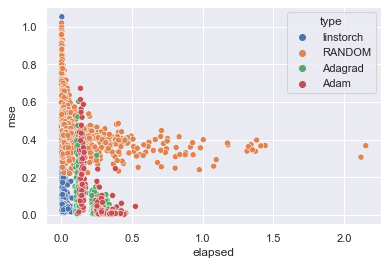

In [90]:
sns.scatterplot(x="elapsed", y="mse", hue='type', data=df)
plt.show()

In [91]:
df.groupby("model")["mse"].mean().head(100)

model
Adagrad1                          0.118330
Adagrad2                          0.037093
Adagrad3                          0.018117
Adam1                             0.230822
Adam2                             0.035274
Adam3                             0.014132
RANDOM(0.4)                       0.338875
RANDOM(0.43157894736842106)       0.378463
RANDOM(0.4631578947368421)        0.398980
RANDOM(0.49473684210526314)       0.430111
RANDOM(0.5263157894736842)        0.450636
RANDOM(0.5578947368421052)        0.477402
RANDOM(0.5894736842105264)        0.499493
RANDOM(0.6210526315789473)        0.539435
RANDOM(0.6526315789473685)        0.560215
RANDOM(0.6842105263157895)        0.579826
RANDOM(0.7157894736842105)        0.612588
RANDOM(0.7473684210526316)        0.630952
RANDOM(0.7789473684210526)        0.658929
RANDOM(0.8105263157894737)        0.685834
RANDOM(0.8421052631578947)        0.709247
RANDOM(0.8736842105263158)        0.737317
RANDOM(0.9052631578947369)        0.765469
RANDO

In [92]:
df.groupby("model")["type"].head()

0       linstorch
1       linstorch
2       linstorch
3       linstorch
4       linstorch
          ...    
4800         Adam
4801         Adam
4802         Adam
4803         Adam
4804         Adam
Name: type, Length: 230, dtype: object

In [93]:
len(df.groupby("model")["mse"].mean())

46

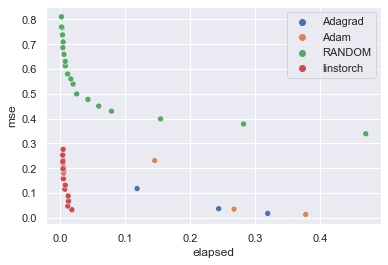

In [94]:
sns.scatterplot(x=df.groupby("model")["elapsed"].mean(), y=df.groupby("model")["mse"].mean(), hue=list(map(lambda x: x[0], df.groupby("model")["type"].unique().values)))
plt.show()

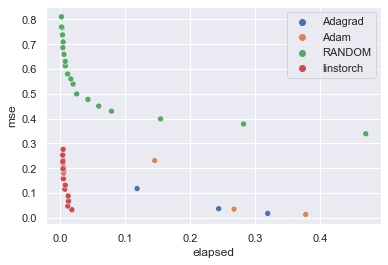

In [95]:
sns.scatterplot(x=df.groupby("model")["elapsed"].mean(), y=df.groupby("model")["mse"].mean(), hue=list(map(lambda x: x[0], df.groupby("model")["type"].unique().values)))
plt.savefig("outm/elapsed_mse_scatter.png")

In [96]:
df.groupby("model")[["elapsed","mse"]].mean().head(100)

,elapsed,mse
model,,
Adagrad1,0.118060,0.118330
Adagrad2,0.243880,0.037093
Adagrad3,0.319538,0.018117
Adam1,0.145250,0.230822
Adam2,0.267564,0.035274
Adam3,0.378136,0.014132
RANDOM(0.4),0.470670,0.338875
RANDOM(0.43157894736842106),0.282270,0.378463
RANDOM(0.4631578947368421),0.154280,0.398980


In [97]:
# sns.scatterplot(x=df[(df["model"]=="Adagrad3")]["elapsed"], y=df[(df["model"]=="Adagrad3")]["mse"])
# sns.scatterplot(x=df[(df["model"]=="linstorch")]["elapsed"], y=df[(df["model"]=="linstorch")]["mse"])
# plt.show()

c:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

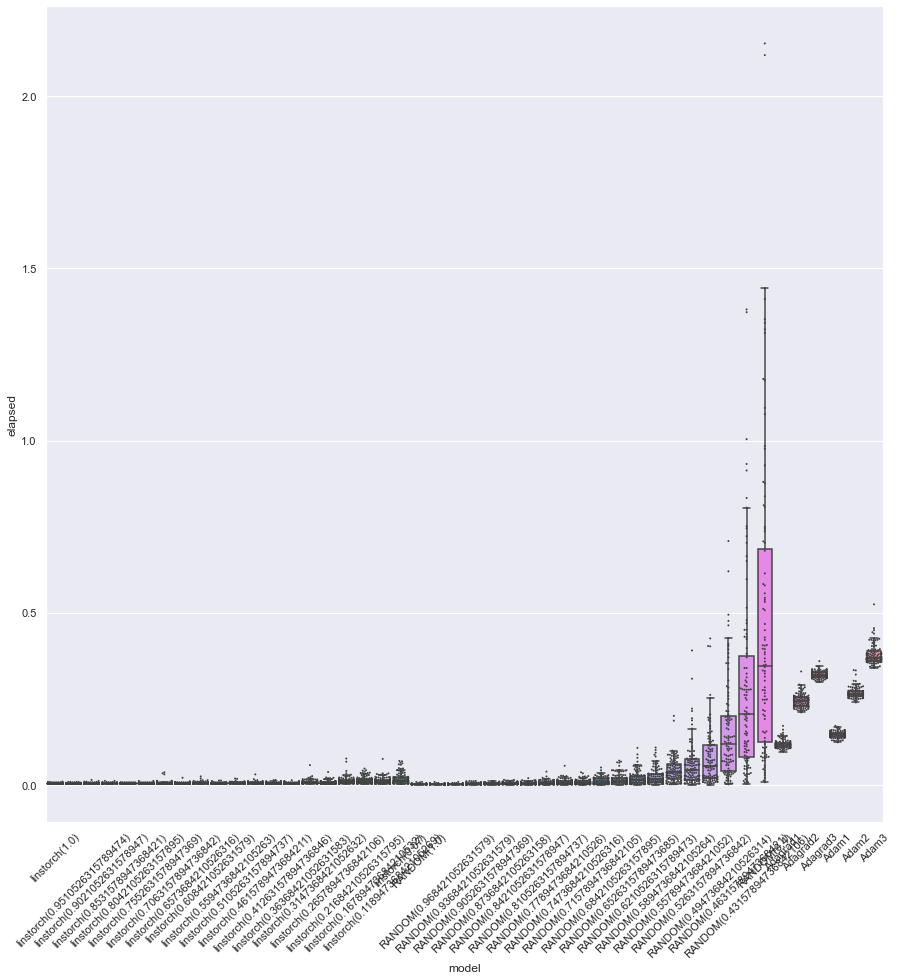

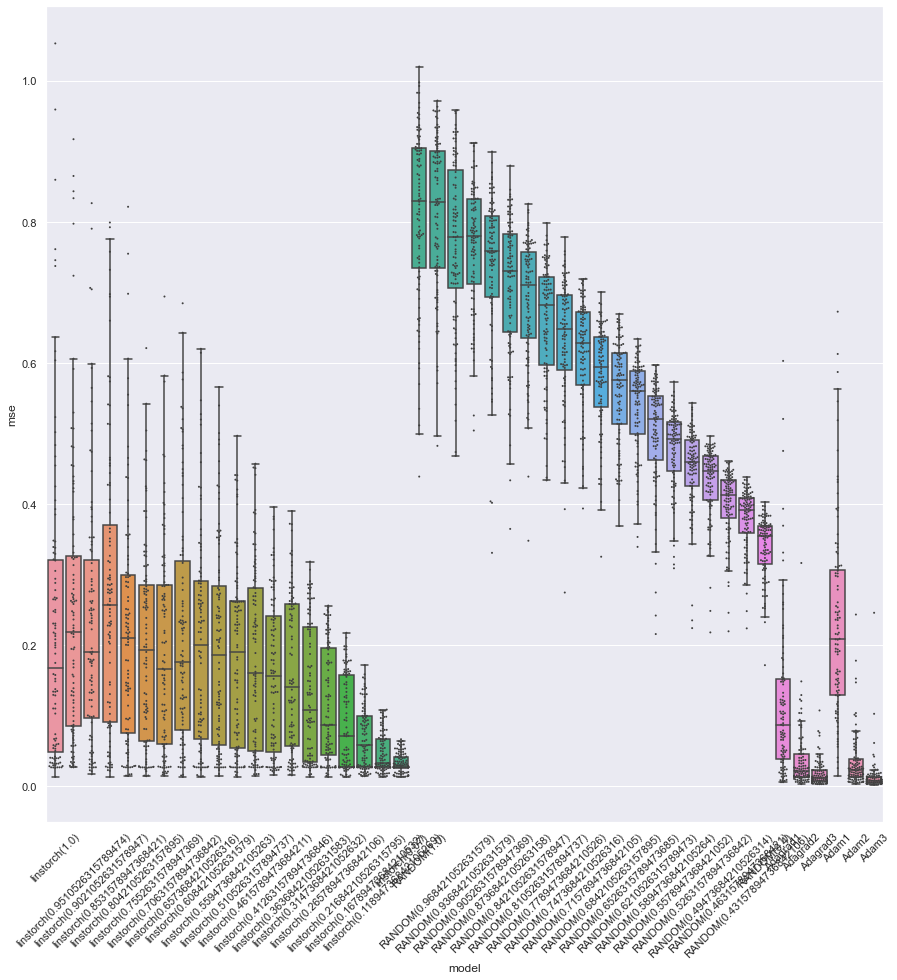

In [98]:
for stat in stats:
    if stat == "type": continue
    plt.subplots(figsize=(15,15))
    # ax = sns.violinplot(x="model", y=stat, data=df)
    # fig = ax.get_figure()
    # fig.savefig("out/" + stat + '_swarm.png')
    ax = sns.boxplot(x="model", y=stat, data=df, showfliers=False)
    ax = sns.swarmplot(x="model", y=stat, data=df, color=".25", s = 2)
    # if stat=="mse": plt.hlines(0.8453290438010049, 0, 100)
    plt.xticks(rotation=45)
    plt.savefig("outm/" + stat + '_swarm.png')

In [99]:
df.groupby("model")["mse"].std()

model
Adagrad1                          0.114497
Adagrad2                          0.042472
Adagrad3                          0.018007
Adam1                             0.138489
Adam2                             0.038689
Adam3                             0.026808
RANDOM(0.4)                       0.043382
RANDOM(0.43157894736842106)       0.043073
RANDOM(0.4631578947368421)        0.048468
RANDOM(0.49473684210526314)       0.052368
RANDOM(0.5263157894736842)        0.057903
RANDOM(0.5578947368421052)        0.056256
RANDOM(0.5894736842105264)        0.077709
RANDOM(0.6210526315789473)        0.066179
RANDOM(0.6526315789473685)        0.071715
RANDOM(0.6842105263157895)        0.074298
RANDOM(0.7157894736842105)        0.077417
RANDOM(0.7473684210526316)        0.089979
RANDOM(0.7789473684210526)        0.084588
RANDOM(0.8105263157894737)        0.089814
RANDOM(0.8421052631578947)        0.100185
RANDOM(0.8736842105263158)        0.105803
RANDOM(0.9052631578947369)        0.087981
RANDO